## Overview

We will create a classification model that can predict whether or not a person has heart disease based on that person's physical characteristics (age, gender, cholesterol, etc.).

`heart.csv` This database contains 14 physical attributes based on a patient's physical test. Blood samples are taken and the patient also performs a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is a whole number (0 for no heart disease present, 1 for present). In general, confirming 100% whether a patient has heart disease can be a fairly invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid costly and invasive procedures.

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## DATASET

In [40]:
df = pd.read_csv("heart.csv")

In [41]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [43]:
df['target'].unique()

array([1, 0])

### EDA - Dataviz

In [44]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<Axes: xlabel='target', ylabel='count'>

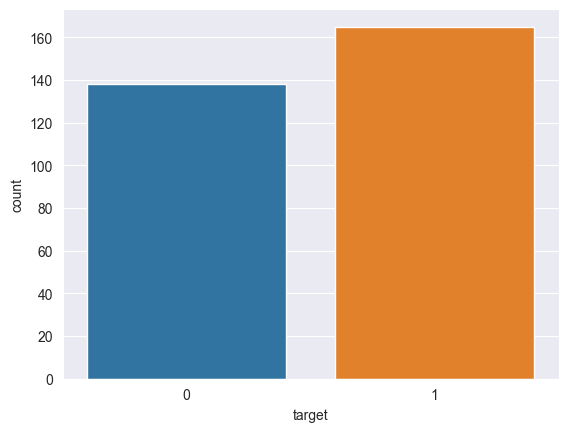

In [45]:
sns.countplot(x='target',data=df)

<Axes: >

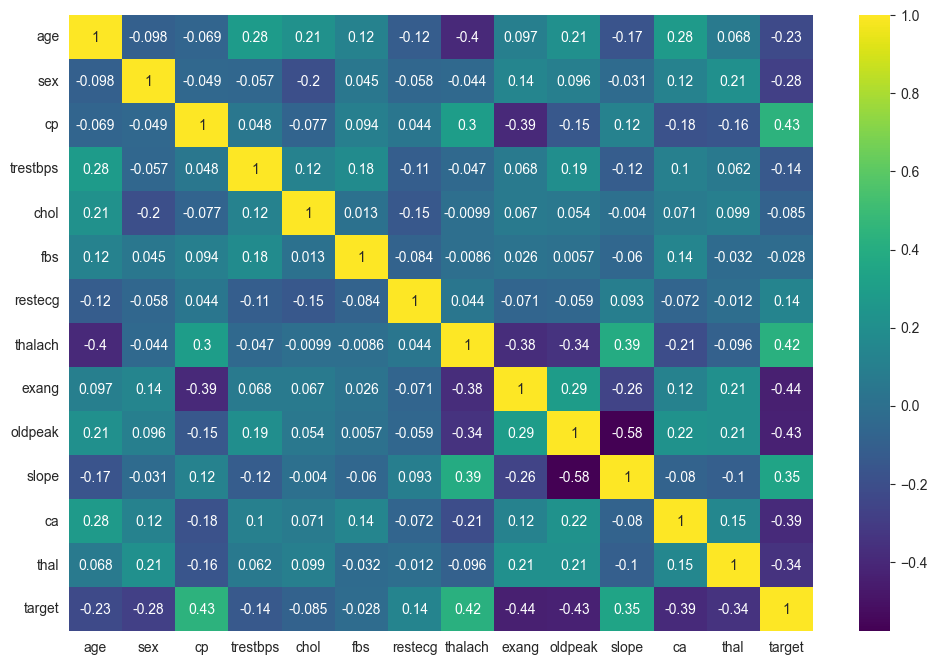

In [46]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

### Separate data with a Test Set and a Train Set

In [47]:
X = df.drop('target',axis=1)
y = df['target']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

### Scaling the features

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Model

In [52]:
from sklearn.linear_model import LogisticRegressionCV

In [53]:
log_model = LogisticRegressionCV()

log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [54]:
log_model.C_

array([0.04641589])

In [55]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

### Coefficients

In [56]:
log_model.coef_

array([[-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
         0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
         0.25101033, -0.49735752, -0.37448551]])

In [57]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0]).sort_values()

<Axes: >

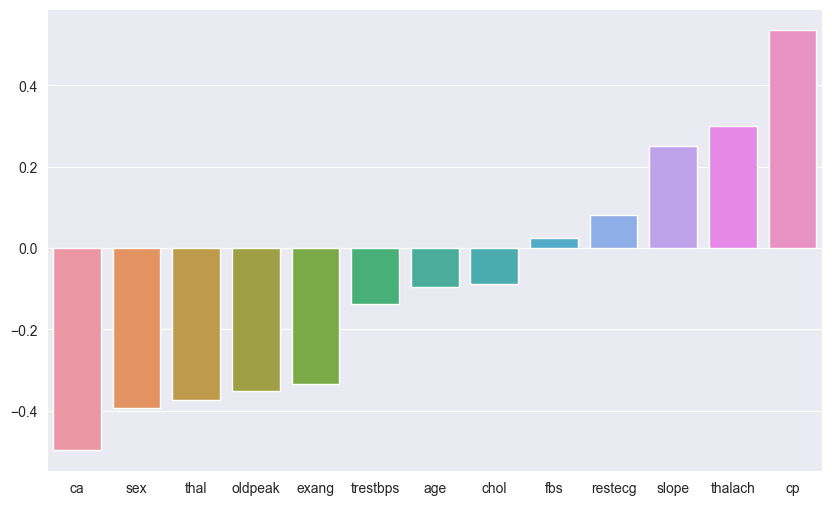

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(x=coefs.index,y=coefs.values)

## Model evaluation

In [59]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [60]:
y_pred = log_model.predict(scaled_X_test)

In [61]:
confusion_matrix(y_test,y_pred)

array([[12,  3],
       [ 2, 14]])

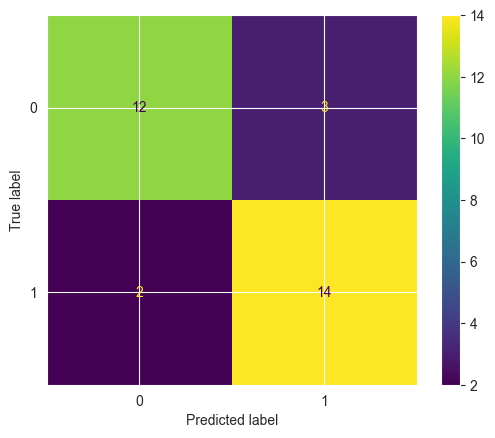

In [62]:
ConfusionMatrixDisplay.from_estimator(log_model,scaled_X_test,y_test);

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [64]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

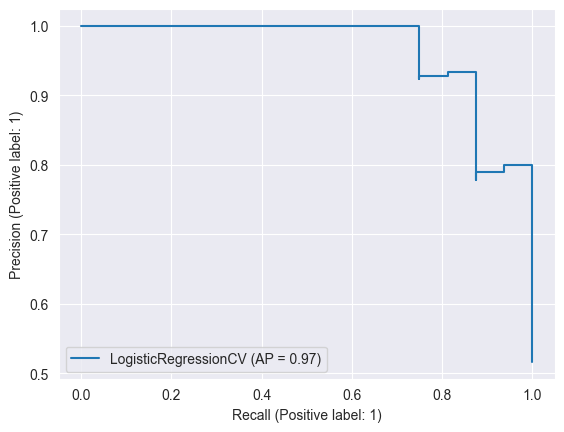

In [65]:
PrecisionRecallDisplay.from_estimator(log_model,scaled_X_test,y_test);

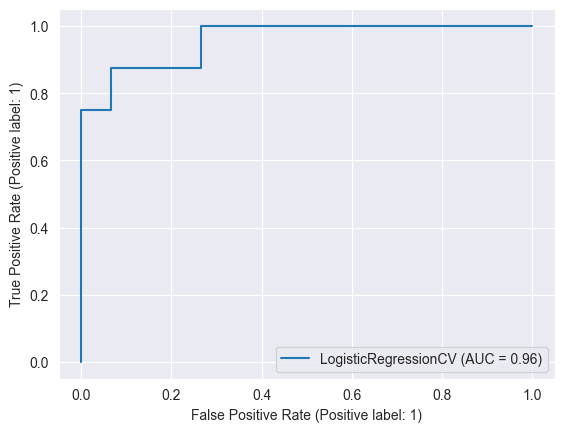

In [66]:
RocCurveDisplay.from_estimator(log_model,scaled_X_test,y_test);

## Test on a new patient

A patient with the following features :

age          48.0
sex           0.0
cp            2.0
trestbps    130.0
chol        275.0
fbs           0.0
restecg       1.0
thalach     139.0
exang         0.0
oldpeak       0.2
slope         2.0
ca            0.0
thal          2.0

In [67]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [68]:
X_test.iloc[-1]

age          54.0
sex           1.0
cp            0.0
trestbps    122.0
chol        286.0
fbs           0.0
restecg       0.0
thalach     116.0
exang         1.0
oldpeak       3.2
slope         1.0
ca            2.0
thal          2.0
Name: 268, dtype: float64

In [69]:
y_test.iloc[-1]

0

In [70]:
X_cols = X.columns

In [71]:
patient = pd.DataFrame(data=patient,columns=X_cols)

In [72]:
scaled_patient = scaler.transform(patient)

In [73]:
log_model.predict(scaled_patient)

array([0])

In [74]:
log_model.predict_proba(scaled_patient)

array([[0.94751173, 0.05248827]])

**So, we find that there is more than a 94% chance that the patient does not have heart disease !**